## A simple simulation procedure for producing gradient-echo imaging k-space data

### Loading julia packages

In [2]:
push!(LOAD_PATH,"library");
addprocs(Sys.CPU_CORES-nprocs());
using myFun
using PyPlot
nprocs()

4

### We will acquire 2D gradient-echo imaging data from a phantom, comprising 3 compartments:
![phantom](phantoms/phantom.jpg)


### We need to specify the following physical properties: 
* $T_2^*$ value for M1
* $T_2^*$ value for M2
* $T_2^*$ value for M3
* Frequency offset value (i.e., chemical shift: $\Delta \omega$ in Hz) for M2
* Frequency offset value (i.e., chemical shift: $\Delta \omega$ in Hz) for M3

In [3]:
T2valueForM1 = Float64(80e-3) # 80 msec
T2valueForM2 = Float64(40e-3) # 40 msec
T2valueForM3 = Float64(150e-3) # 150 msec
FrequencyOffsetForM2 = Float64(1200.) # Hz
FrequencyOffsetForM3 = Float64(-800.); # Hz

### We also need to choose the following MRI scan parameters:
* Field of view (FOV) of imaging
* Dwell time (DW) of k-space data sampling
* Echo time (TE)
* Acquisition matrix size 
* Noise intensity (arbitrary unit)

**TR** is assumed to be significantly larger than T1 in this very simple simulation that does not consider T1 effect

In [36]:
FOV = Float64(250.) # in mm
DW = Float64(50e-6) # hard-coded for now
matrixSizeX = Int64(128) # should be integer: 32, 64, 96 or 128
matrixSizeY = Int64(128) # should be integer: 32, 64, 96 or 128
TE = Float64(50e-3) # 50 msec: The minimal value allowed is about 10 msec.
NoiseLevel = Float64(2000.); # arbitrary unit: between 0 and 100000: you can start with 2000

### Data Acquisition and image reconstruction

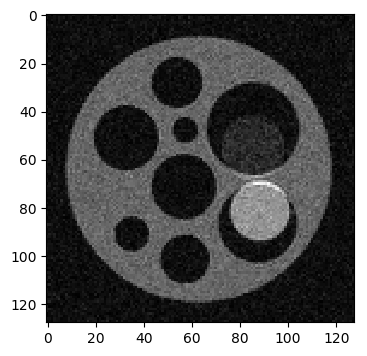

 21.389594 seconds (149.71 k allocations: 9.636 MiB)


In [37]:
# this may take 1 min to run
@time kSpaceData1 = MRIscan(T2valueForM1,T2valueForM2,T2valueForM3,FrequencyOffsetForM2,FrequencyOffsetForM3,FOV,DW,matrixSizeX,matrixSizeY,TE,NoiseLevel);
data1 = fftshift(fft(fftshift(kSpaceData1)));
figure(figsize=(4,4));imshow(abs.(data1),cmap="gray", interpolation="none");

### We will acquire another set of data with different TE value

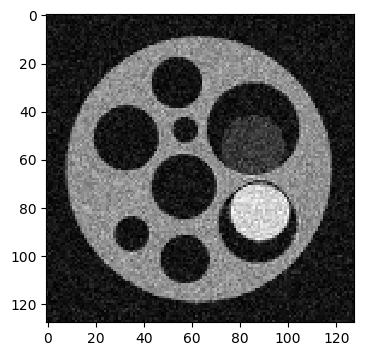

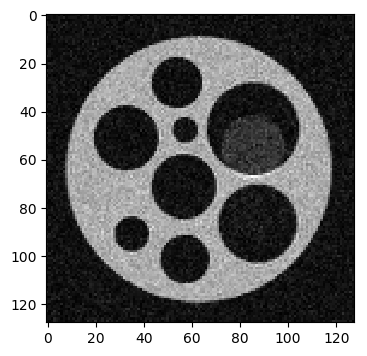

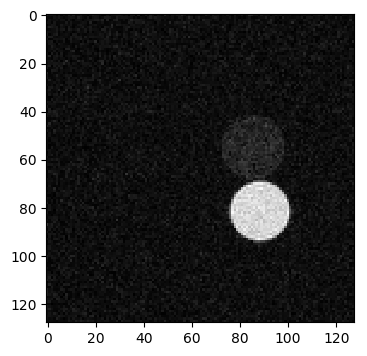

 20.953760 seconds (150.39 k allocations: 9.680 MiB)


In [38]:
# this may take 1 min to run
NewTE = TE + (0.5/FrequencyOffsetForM3);
@time kSpaceData2 = MRIscan(T2valueForM1,T2valueForM2,T2valueForM3,FrequencyOffsetForM2,FrequencyOffsetForM3,FOV,DW,matrixSizeX,matrixSizeY,NewTE,NoiseLevel);
data2 = fftshift(fft(fftshift(kSpaceData2)));
figure(1,figsize=(4,4));imshow(abs.(data2),cmap="gray", interpolation="none"); 
figure(2,figsize=(4,4));imshow(abs.(data1+data2)/2.,cmap="gray", interpolation="none"); 
figure(3,figsize=(4,4));imshow(abs.(data1-data2)/2.,cmap="gray", interpolation="none"); 

### Homework
* You may choose different phantom properties
* You may try different FOV, TE values, matrix size, noise level
* You may produce more images and average them to increase the signal to noise ratio
* You may produce multi-TE images for T2 mapping
* You may zero fill any part of the k-space and see the impact on reconstructed images (e.g., $k_y$ lines 1 to 30; or odd $k_y$ lines)
* You may look into __chemical shift effect__
* You may find a way to produce images with only signals from M2
